<a href="https://colab.research.google.com/github/shashwat2820/deep-learning/blob/main/complete_simple_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
from torch import nn
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 




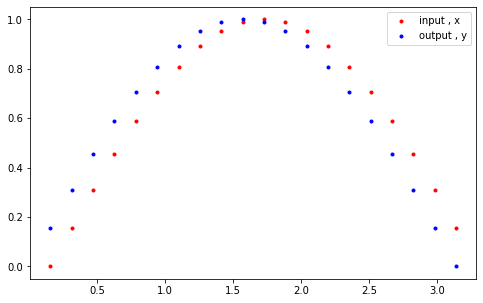

In [ ]:
plt.figure(figsize=(8,5))

# how many time steps/data pts are in one batch of data
seq_length = 20 # length of data rnn will see

# generate evenly spaced data pts
time_steps = np.linspace(0,np.pi,seq_length + 1)
data = np.sin(time_steps)# sin has enough variance ,  shape and very predicatable 
data.resize((seq_length + 1 , 1)) # size becomes (seq_length+1, 1), adds an input_size dimension

#creating the input and target sequence of the required size  here both should contain 20 data points and the input size of 1
x = data[:-1] # all but the last piece of data
y = data[1:]  # all but the first

plt.plot(time_steps[1:] , x ,'r.', label = 'input , x')
plt.plot(time_steps[1:] , y , 'b.', label = 'output , y')

# display the data
plt.legend(loc='best')
plt.show()

In [ ]:
#defining the the RNN model
class RNN(nn.Module):
  def __init__(self,input_size , hidden_dim ,output_size ,  n_layers):
    super(RNN,self).__init__()

# input_size -- no. of input features 
    self.hidden_dim = hidden_dim #storing the hidden dimensions for future use 

    #define the RNN 
    #batch_first=True means that the first dimension of the input and the output tensors will be the batch size 
    self.rnn = nn.RNN(input_size ,  hidden_dim , n_layers , batch_first = True )
    #the fully connected layer 
    self.fc = nn.Linear(hidden_dim , output_size) # takes output of the the rnn (dimension values of the final hidden state as the input and output) 

#x is the input , hidden is teh features of the hidden state 
  def forward(self,x,hidden): 

  # x (batch_size, seq_length, input_size)
  # hidden (n_layers, batch_size, hidden_dim)
  # r_out (batch_size, time_step, hidden_dim)
    batch_size = x.size(0)

  #the rnn inputs the input and the hidden state of the previous rnn and returns the output and the next and its own hidden_sate as the ouput 
    r_out , hidden = self.rnn(x,hidden)

  # shape output to be (batch_size*seq_length, hidden_dim) = shape of y_tensor inorder to comapre it with the y_tensor in the criterion step
    r_out = r_out.view(-1, self.hidden_dim)
  
  #output of the fully connected_layer 
    output = self.fc(r_out)

    return output , hidden 

'''Applies a multi-layer Elman RNN with \tanh or \text{ReLU} non-linearity to an
input sequence.

For each element in the input sequence, each layer computes the following
function:

where h_t is the hidden state at time t, x_t is
the input at time t, and h_{(t-1)} is the hidden state of the
previous layer at time t-1 or the initial hidden state at time 0.
If nonlinearity is 'relu', then \text{ReLU} is used instead of \tanh.'''


"Applies a multi-layer Elman RNN with \tanh or \text{ReLU} non-linearity to an\ninput sequence.\n\nFor each element in the input sequence, each layer computes the following\nfunction:\n\nwhere h_t is the hidden state at time t, x_t is\nthe input at time t, and h_{(t-1)} is the hidden state of the\nprevious layer at time t-1 or the initial hidden state at time 0.\nIf nonlinearity is 'relu', then \text{ReLU} is used instead of \tanh."

In [ ]:
#checking the dimensions of the rnn 

test_rnn = RNN(input_size = 1 , output_size = 1 , hidden_dim = 10 , n_layers = 2)

#generate evenly spaced test data points 

time_step  = np.linspace(0 , np.pi ,seq_length) # in the range od (o,pi) take seq_lenght(=20) input samples 
data = np.sin(time_step) 
print(data.shape)
data.resize((seq_length , 1)) 
print(data.shape) #-->(20,1)

test_input = torch.Tensor(data).unsqueeze(0) # unsqueezing the input column vector ('data' of shape(20,1)) into a 3-d tensor with the batch_size(=num of sequences = here 1) as the first dimension
print('Input_size' , test_input.size())

test_out, test_h  = test_rnn(test_input , None) #setting the initial hidden state as to be None 
print('Output Size ' , test_out.size())
print('Hidden state Size' , test_h.size())

Input_size torch.Size([1, 20, 1])
Output Size  torch.Size([20, 1])
Hidden state Size torch.Size([2, 1, 10])


In [ ]:
#deciding the hyperparameters of the rnn
input_size = 1 
output_size = 1 
hidden_dim = 32 
n_layers = 1

rnn = RNN(input_size , output_size , hidden_dim , n_layers)
print(rnn)   

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [ ]:
criterion = nn.MSELoss() 
optimizer = torch.optim.Adam(rnn.parameters() , lr = 0.01)

In [ ]:
#training the rnn

# inputs the rnn , the number of steps to train for , the number of iterations after which the graph should be printed
def train(rnn , n_steps , print_every):

   n_steps = 75 
   #initialize the hidden state 
   hidden = None 

   for batch_i , step in enumerate(range(n_steps)):

     time_steps = np.linspace(step*np.pi , (step+1)*np.pi , seq_length + 1)
     data = np.sin(time_steps)
     data.resize((seq_length+1 , 1 ))

     x = data[:-1]
     y = data[1:]
     
     #convert the data into tensors 
     x_tensor = torch.Tensor(x).unsqueeze(0)
     y_tensor = torch.Tensor(y)

     #outputs of the rnn 
     prediction , hidden = rnn(x_tensor , hidden)

  
     # make a new variable for hidden and detach the hidden state from its history
     # this way, we don't backpropagate through the entire history
     hidden = hidden.data

     loss = criterion(prediction , y_tensor)

     optimizer.zero_grad()

     loss.backward()

     optimizer.step()

     
     if batch_i%print_every == 0:
       print('Loss' , loss.item())
       plt.plot(time_steps[1:] , x , 'r.' , label = 'input , x')
       plt.plot(time_steps[1:] , prediction.data.numpy().flatten() , 'b.' , label = 'output , y')
       plt.show()

   return rnn





Loss 0.3022996783256531


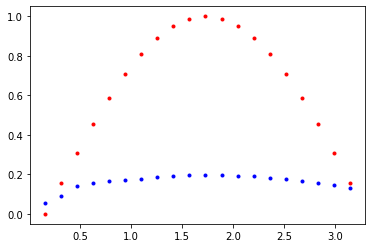

Loss 0.030633827671408653


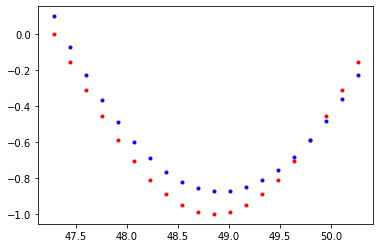

Loss 0.011322486214339733


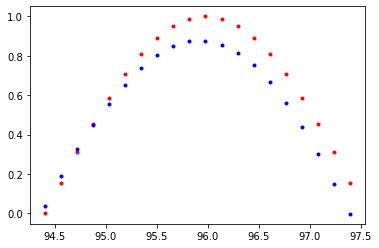

Loss 0.001207751571200788


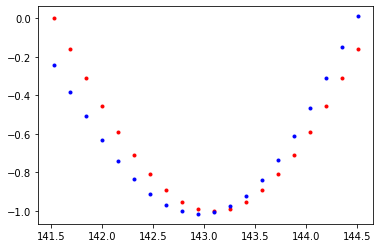

Loss 0.000456951092928648


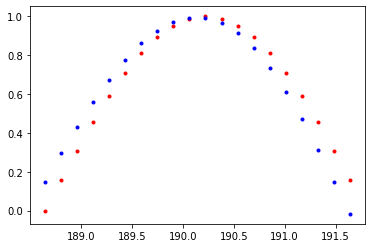

In [ ]:
n_steps = 75 
print_every  = 15 
trained_rnn  = train(rnn , n_steps , print_every)